# DS-NYC-45 | Unit Project 2: Exploratory Data Analysis

In this project, you will implement the exploratory analysis plan developed in Unit Project 1.  This will lay the groundwork for our our first modeling exercise in Unit Project 3.

First, load the python libraries you will need for this project:

In [68]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

pd.set_option('display.max_rows', 10)
pd.set_option('display.max_columns', 10)
pd.set_option('display.notebook_repr_html', True)

%matplotlib inline
plt.style.use('ggplot')

Then, read in your dataset:

In [22]:
df = pd.read_csv(os.path.join('..', '..', 'dataset', 'ucla-admissions.csv'))

df.head()

,admit,gre,gpa,prestige
0,0,380.0,3.61,3.0
1,1,660.0,3.67,3.0
2,1,800.0,4.00,1.0
3,1,640.0,3.19,4.0
4,0,520.0,2.93,4.0


## Questions

> ### Question 1.  How many observations are in our dataset?

In [23]:
df.count()

admit       400
gre         398
gpa         398
prestige    399
dtype: int64

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 4 columns):
admit       400 non-null int64
gre         398 non-null float64
gpa         398 non-null float64
prestige    399 non-null float64
dtypes: float64(3), int64(1)
memory usage: 12.6 KB


Answer: Our predictor columnn has 400 observations however our lowest number of observations is 398 belong to the variables GRE and GPA.

> ### Question 2.  Create a summary table.

In [24]:
df.describe()

,admit,gre,gpa,prestige
count,400.000000,398.000000,398.00000,399.000000
mean,0.317500,588.040201,3.39093,2.486216
std,0.466087,115.628513,0.38063,0.945333
min,0.000000,220.000000,2.26000,1.000000
25%,0.000000,NaN,NaN,NaN
50%,0.000000,NaN,NaN,NaN
75%,1.000000,NaN,NaN,NaN
max,1.000000,800.000000,4.00000,4.000000


> ### Question 3.  Why would `gre` have a larger variance than `gpa`?

Answer:
GPA would have a lower variance because it has a smaller range of outcomes. Students can score any decimal values from 1 to 4 (it'll be rare that a student has a GPA of 1 and we can see that the lowest GPA is 2.26). GRE on the other hand students can score any value from 200 to 800.

> ### Question 4.  Drop data points with missing data.

In [32]:
clean_df = df.dropna(axis=0)

> ### Question 5.  Confirm that you dropped the correct data.  How can you tell?

In [33]:
clean_df.count()

admit       397
gre         397
gpa         397
prestige    397
dtype: int64

In [34]:
clean_df.describe()

,admit,gre,gpa,prestige
count,397.000000,397.000000,397.000000,397.000000
mean,0.317380,587.858942,3.392242,2.488665
std,0.466044,115.717787,0.380208,0.947083
min,0.000000,220.000000,2.260000,1.000000
25%,0.000000,520.000000,3.130000,2.000000
50%,0.000000,580.000000,3.400000,2.000000
75%,1.000000,660.000000,3.670000,3.000000
max,1.000000,800.000000,4.000000,4.000000


Answer: 
I peformed a count on the new cleaned data to verify that all columns have the same number of observations (removing any NA's). Additionally, when I run the describe function on Clean_df I can see that my quartiles are now able to calculate because all NA errors are removed.

> ### Question 6.  Create boxplots for `gre` and `gpa`.

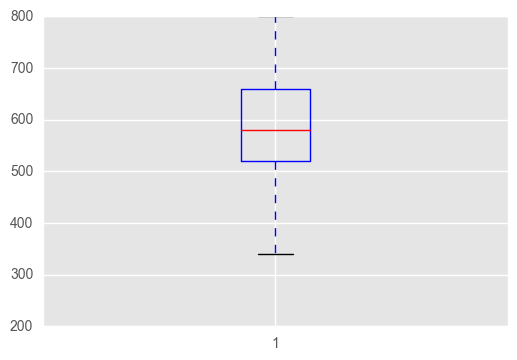

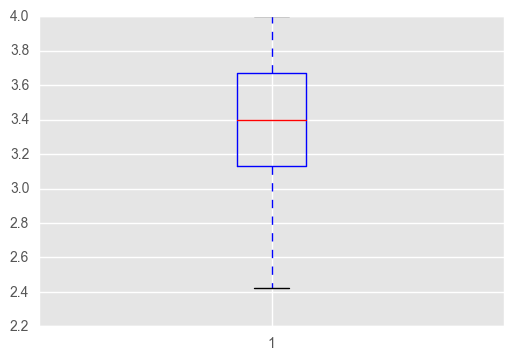

In [45]:
plt.figure(1)
plt.boxplot(clean_df['gre'])
plt.figure(2)
plt.boxplot(clean_df['gpa']);

> ### Question 7.  What do boxplots show?

Answer:

The boxplots show the range of both GRE and GPA as well as their interquartile ranges. GRE has a much wider distance between the max and min values scored in comparison to GPA. 

> ### Question 8.  Plot the distribution of each variable.

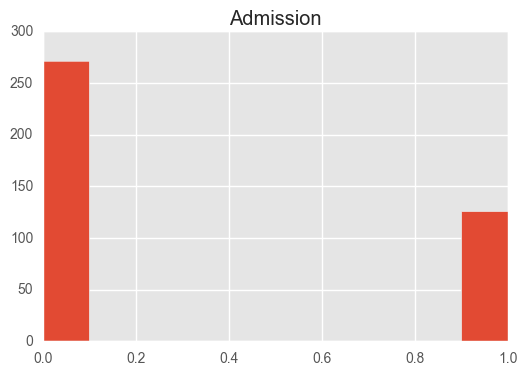

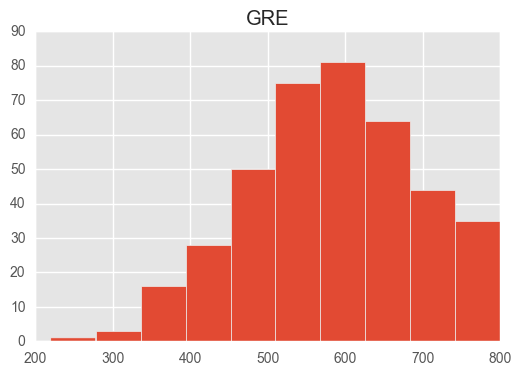

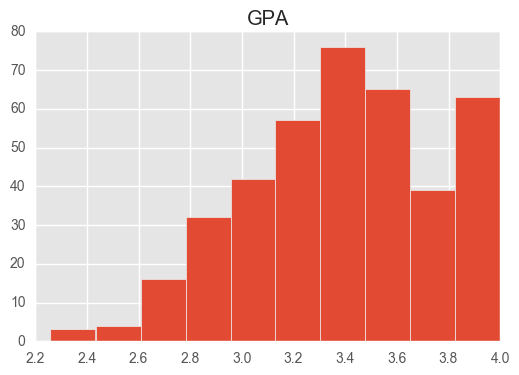

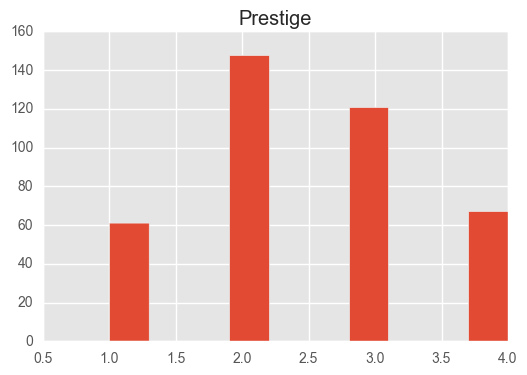

In [64]:
plt.figure(1)
plt.hist(clean_df['admit'])
plt.title('Admission')

plt.figure(2)
plt.hist(clean_df['gre'])
plt.title("GRE")

plt.figure(3)
plt.hist(clean_df['gpa'])
plt.title("GPA")

plt.figure(4)
plt.hist(clean_df['prestige'])
plt.title("Prestige");

> ### Question 9.  If our model had an assumption of a normal distribution for `gre` and `gpa`, would we meet that requirement?  Would their distributions need correction?  If so, why, why not?  How?

In [1]:
# GRE appears to be normally distrubuted looking at the histogram as it follows a nice bell curve.

In [2]:
# GPA is relatively normally distributed. There is a slight left skew as that last bin shoots back up causing a shift. You can attempt to normalize the column by performing log to see if balances out any extremes in the dataset.  

Answer:

> ### Question 10.  Create a correlation matrix for the dataset

In [58]:
clean_df.corr()

,admit,gre,gpa,prestige
admit,1.000000,0.181202,0.174116,-0.243563
gre,0.181202,1.000000,0.382408,-0.124533
gpa,0.174116,0.382408,1.000000,-0.060976
prestige,-0.243563,-0.124533,-0.060976,1.000000


> ### Question 11.  What did you find?  Which of our variables are potentially colinear?

Answer: There isn't high correlation among the variables. It looks like GPA and GRE share the highest correlation of .38240. It may be possible that they are colinear. It would make sense that a student with a higher GPA would score higher on the GRE due to the amount of study hours put in. That might be something to look out for. 

> ### Question 12.  Write an analysis plan for exploring the association between graduate school admission rates and prestige of undergraduate schools.

Answer:

Goals: Define the relationship between Grad School Admission and School Prestige by using a linear regression with y = Admission and X = Prestige. We can run our resulting P value to test for significance.

Assumption on Data Distribution: We assume that our data is normally distributed. Looking at prestige's histogram we can see that it is fairly normally distributed.

Outliers: Since prestige is a categorical data type we avoid outliers and can proceed with epxloring the data.

Test for colinearity between Admission and Prestige: We can see that there is a negative -0.243563 correlation between the two using our correlation matrix above. This makes sense since Prestige is ranked 1 to 4, with 1 being the highest.


> ### Question 13.  What is your hypothesis?

Answer: A candidate from a more prestigious school will have a higher likelihood of being admitted into UCLA's grad program.